In [63]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/malditof-salmonella-peaks/NMFLabel2.csv
/kaggle/input/malditof-salmonella-peaks/NMFMat2.csv
/kaggle/input/malditof-salmonella-peaks/NMFNorm.csv
/kaggle/input/malditof-salmonella-peaks/NMFLabel3.csv
/kaggle/input/malditof-salmonella-peaks/SalmonellaMSUnprocessed.csv
/kaggle/input/malditof-salmonella-peaks/SalmonellaMS.csv
/kaggle/input/malditof-salmonella-peaks/UnprocessedMS.csv
/kaggle/input/malditof-salmonella-peaks/NMFLabel.csv


## Import the data and inspect it

In [64]:
#Input: preprocessed spectrum of Salmonella enterica
df=pd.read_csv("../input/malditof-salmonella-peaks/SalmonellaMS.csv")
df

,Serovar,2009.46845227804,2014.77082772346,2019.12161484084,2024.2790310648,2028.375792639,2030.49475582572,2034.69912717199,2044.89907509836,2058.77428191415,...,16012.2376991515,16030.0682963457,17461.8511968233,17480.3477737506,17666.8197437252,17731.3031997872,18543.0162507726,18572.6610636889,18635.2401268625,18961.282831126
0,Agona,3.347519e-05,4.023244e-05,0.000007,6.219005e-06,0.000042,0.000066,0.000070,0.000032,0.000063,...,0.000217,0.000112,0.000160,0.000102,0.000052,0.000021,0.000021,0.000037,0.000057,0.000058
1,Agona,7.581351e-05,4.476395e-07,0.000078,6.344742e-05,0.000033,0.000027,0.000043,0.000014,0.000079,...,0.000159,0.000135,0.000098,0.000099,0.000016,0.000009,0.000138,0.000137,0.000047,0.000037
2,Agona,2.029179e-05,2.146638e-05,0.000071,4.983972e-08,0.000052,0.000081,0.000096,0.000027,0.000047,...,0.000159,0.000090,0.000118,0.000109,0.000040,0.000002,0.000073,0.000080,0.000025,0.000062
3,Agona,7.892457e-06,4.773027e-05,0.000026,1.136124e-04,0.000011,0.000017,0.000146,0.000032,0.000026,...,0.000096,0.000061,0.000015,0.000075,0.000023,0.000039,0.000088,0.000069,0.000024,0.000030
4,Agona,6.856369e-05,1.105817e-04,0.000015,4.173920e-05,0.000072,0.000060,0.000072,0.000080,0.000150,...,0.000104,0.000058,0.000021,0.000059,0.000015,0.000009,0.000054,0.000037,0.000044,0.000053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Typhimurium,6.018694e-05,2.077613e-05,0.000055,6.820284e-05,0.000069,0.000088,0.000089,0.000053,0.000070,...,0.000156,0.000044,0.000071,0.000013,0.000016,0.000009,0.000073,0.000033,0.000081,0.000064
196,Typhimurium,6.744089e-05,5.211717e-05,0.000021,2.711510e-05,0.000040,0.000035,0.000096,0.000002,0.000072,...,0.000129,0.000030,0.000053,0.000006,0.000023,0.000026,0.000032,0.000018,0.000049,0.000031
197,Typhimurium,7.276207e-05,1.323812e-04,0.000023,4.556441e-05,0.000004,0.000077,0.000184,0.000008,0.000174,...,0.000106,0.000025,0.000044,0.000027,0.000003,0.000010,0.000062,0.000034,0.000050,0.000032
198,Typhimurium,3.750365e-08,4.720345e-05,0.000035,1.874377e-05,0.000037,0.000055,0.000113,0.000044,0.000081,...,0.000119,0.000036,0.000068,0.000025,0.000004,0.000020,0.000106,0.000053,0.000055,0.000048


In [65]:
df["Serovar"].value_counts()

Agona          40
Albany         40
Altona         40
Enteriditis    40
Typhimurium    40
Name: Serovar, dtype: int64

In [66]:
df.describe()

,2009.46845227804,2014.77082772346,2019.12161484084,2024.2790310648,2028.375792639,2030.49475582572,2034.69912717199,2044.89907509836,2058.77428191415,2069.36634620391,...,16012.2376991515,16030.0682963457,17461.8511968233,17480.3477737506,17666.8197437252,17731.3031997872,18543.0162507726,18572.6610636889,18635.2401268625,18961.282831126
count,200.000000,2.000000e+02,200.000000,2.000000e+02,200.000000,2.000000e+02,200.000000,2.000000e+02,200.000000,2.000000e+02,...,200.000000,200.000000,200.000000,200.000000,2.000000e+02,2.000000e+02,2.000000e+02,200.000000,2.000000e+02,2.000000e+02
mean,0.000040,3.368021e-05,0.000029,3.210612e-05,0.000037,4.095773e-05,0.000110,2.683059e-05,0.000069,4.114279e-05,...,0.000167,0.000060,0.000103,0.000055,2.262739e-05,1.863015e-05,3.664089e-05,0.000029,6.199986e-05,5.238844e-05
std,0.000034,2.723020e-05,0.000022,2.450972e-05,0.000027,2.950950e-05,0.000050,2.458747e-05,0.000038,2.996699e-05,...,0.000042,0.000024,0.000042,0.000027,1.710592e-05,1.456716e-05,3.423927e-05,0.000029,6.021796e-05,4.194442e-05
min,0.000000,3.072801e-08,0.000000,1.747907e-09,0.000000,6.542303e-08,0.000013,3.378004e-08,0.000000,8.086354e-08,...,0.000061,0.000008,0.000015,0.000006,1.698503e-07,5.984955e-09,9.735816e-08,0.000000,2.685744e-07,3.309305e-07
25%,0.000011,1.383105e-05,0.000012,1.283606e-05,0.000015,1.739042e-05,0.000071,7.998883e-06,0.000041,2.058270e-05,...,0.000143,0.000043,0.000070,0.000033,1.233410e-05,8.992523e-06,1.221168e-05,0.000010,2.450603e-05,2.671095e-05
50%,0.000033,2.705473e-05,0.000024,2.896777e-05,0.000033,3.604372e-05,0.000098,2.168787e-05,0.000066,3.466257e-05,...,0.000164,0.000059,0.000100,0.000055,1.936635e-05,1.555182e-05,2.475789e-05,0.000021,4.023509e-05,4.108706e-05
75%,0.000060,4.728144e-05,0.000040,4.242381e-05,0.000054,5.985210e-05,0.000147,3.921022e-05,0.000092,5.591640e-05,...,0.000191,0.000073,0.000139,0.000072,2.998088e-05,2.596650e-05,5.378920e-05,0.000036,7.374179e-05,6.288078e-05
max,0.000165,1.458518e-04,0.000130,1.301392e-04,0.000140,1.493006e-04,0.000259,1.501011e-04,0.000207,1.806998e-04,...,0.000298,0.000143,0.000219,0.000171,1.501152e-04,1.041691e-04,1.634036e-04,0.000164,3.526928e-04,2.301069e-04


## Split into training set and testing set

In [67]:
X=df.iloc[:,1:]
Y=df.iloc[:,0]

In [68]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
std_scaler = StandardScaler()
std_scaler
# fit and transform the data
X_scaled = pd.DataFrame(std_scaler.fit_transform(X), columns=X.columns)

X_scaled

,2009.46845227804,2014.77082772346,2019.12161484084,2024.2790310648,2028.375792639,2030.49475582572,2034.69912717199,2044.89907509836,2058.77428191415,2069.36634620391,...,16012.2376991515,16030.0682963457,17461.8511968233,17480.3477737506,17666.8197437252,17731.3031997872,18543.0162507726,18572.6610636889,18635.2401268625,18961.282831126
0,-0.180732,0.241227,-0.966668,-1.058849,0.182264,0.858743,-0.801225,0.220037,-0.176126,0.615695,...,1.184785,2.145076,1.370658,1.737997,1.701393,0.184744,-0.459071,0.266765,-0.085516,0.132841
1,1.084928,-1.223493,2.223123,1.281938,-0.134231,-0.460463,-1.339320,-0.519534,0.257745,-0.275643,...,-0.181930,3.104023,-0.130399,1.627948,-0.360997,-0.658318,2.979824,3.755001,-0.243611,-0.361742
2,-0.574836,-0.449665,1.928165,-1.311183,0.527825,1.374961,-0.281649,-0.002777,-0.599194,-1.303499,...,-0.178138,1.255406,0.368582,1.967688,1.021225,-1.114790,1.066307,1.779097,-0.617316,0.235062
3,-0.945502,0.517268,-0.103561,3.333813,-0.944866,-0.819876,0.718964,0.226248,-1.136250,0.937644,...,-1.670060,0.030949,-2.108207,0.722890,0.020287,1.402276,1.510812,1.389884,-0.638265,-0.532053
4,0.868203,2.831212,-0.595553,0.394017,1.273678,0.636777,-0.759132,2.180154,2.137850,0.693027,...,-1.497977,-0.067337,-1.972004,0.167718,-0.462982,-0.685717,0.512649,0.268556,-0.297128,0.021980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.617788,-0.475078,1.210340,1.476447,1.176010,1.606345,-0.414457,1.057445,0.003081,1.441187,...,-0.262160,-0.673548,-0.780644,-1.527888,-0.412818,-0.637879,1.061431,0.135203,0.314269,0.275813
196,0.834638,0.678777,-0.320536,-0.204145,0.099988,-0.211677,-0.277676,-0.995697,0.079237,0.508760,...,-0.891687,-1.241598,-1.200976,-1.780801,0.033921,0.505681,-0.131418,-0.371051,-0.217282,-0.508286
197,0.993709,3.633784,-0.249773,0.550478,-1.219040,1.232271,1.484891,-0.770912,2.757633,0.490537,...,-1.436807,-1.432130,-1.421005,-1.001263,-1.153051,-0.615354,0.732489,0.186462,-0.192219,-0.479558
198,-1.180318,0.497873,0.292674,-0.546554,0.005536,0.467223,0.073357,0.700295,0.304815,0.416295,...,-1.139421,-0.990448,-0.831303,-1.073954,-1.096267,0.093394,2.041383,0.819408,-0.116771,-0.110671


In [69]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.3,random_state=42,stratify=df["Serovar"])
Y_train.value_counts()/len(Y_train)

Agona          0.2
Typhimurium    0.2
Enteriditis    0.2
Albany         0.2
Altona         0.2
Name: Serovar, dtype: float64

## 461 features analysis

Random Forest, k-NN, SVM, NN with 10-fold cross validation (same parameters for 13 and 6 features)

In [70]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=2000,min_samples_leaf=20)

clf.fit(X_train,Y_train)

Y_pred=clf.predict(X_test)

In [71]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.95


In [72]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(clf, X_scaled, Y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.995 (0.015)


If you want to extract features importances from RF, uncomment the code below. Note the results will vary slightly every single time.

In [73]:
'''
feature_importance=clf.feature_importances_
col=X.keys()
features=sorted(zip(feature_importance,col),reverse=True)
features
'''

'\nfeature_importance=clf.feature_importances_\ncol=X.keys()\nfeatures=sorted(zip(feature_importance,col),reverse=True)\nfeatures\n'

In [74]:
from sklearn.neighbors import KNeighborsClassifier
clf2=KNeighborsClassifier(n_neighbors=10,weights="distance")

clf2.fit(X_train,Y_train)

Y_pred=clf2.predict(X_test)

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.8333333333333334


In [75]:
cv2 = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(clf2, X_scaled, Y, scoring='accuracy', cv=cv2, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.810 (0.128)


In [76]:
from sklearn.neural_network import MLPClassifier

#Initializing the MLPClassifier
clf3 = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,learning_rate="adaptive",activation = 'tanh',solver='sgd',random_state=16)

#Fitting the training data to the network
clf3.fit(X_train, Y_train)

#Predicting y for X_val
Y_pred = clf3.predict(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [77]:
cv3 = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(clf3, X_scaled, Y, scoring='accuracy', cv=cv3, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.945 (0.057)


In [78]:
from sklearn.linear_model import SGDClassifier

# Instantiate SVM classifier using SGDClassifier
svm = SGDClassifier(loss='log')
 
# Fit the model
svm.fit(X_train, Y_train)
 
# Model Performance
Y_pred = svm.predict(X_test)
print('Accuracy: %.3f' % metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.983


In [79]:
cv4 = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(svm, X_scaled, Y, scoring='accuracy', cv=cv4, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.975 (0.025)


## 13 features analysis

In [80]:
features_df=df[["Serovar","9101.12558588838", "7112.31470067853", "8418.27756106466", "8729.15306364918", "10925.924979131", "6036.91667864666", "6753.68370441107", "3017.06873902124", "8451.5092358895", "10972.1278473662", "7097.06733278415", "6011.85665943984", "10955.5896961202"]]
features_df

,Serovar,9101.12558588838,7112.31470067853,8418.27756106466,8729.15306364918,10925.924979131,6036.91667864666,6753.68370441107,3017.06873902124,8451.5092358895,10972.1278473662,7097.06733278415,6011.85665943984,10955.5896961202
0,Agona,0.000193,0.000234,0.000117,0.000003,1.508907e-05,0.000031,0.000087,0.000002,4.423261e-06,0.000068,0.000037,0.000815,0.000293
1,Agona,0.000246,0.000150,0.000065,0.000058,1.134638e-05,0.000006,0.000087,0.000013,3.381228e-05,0.000068,0.000013,0.000490,0.000217
2,Agona,0.000204,0.000200,0.000156,0.000014,4.864273e-07,0.000026,0.000081,0.000043,0.000000e+00,0.000133,0.000066,0.000894,0.000376
3,Agona,0.000101,0.000186,0.000163,0.000056,2.364207e-05,0.000043,0.000087,0.000120,8.399773e-07,0.000172,0.000034,0.001202,0.000415
4,Agona,0.000106,0.000211,0.000143,0.000042,1.554356e-05,0.000095,0.000016,0.000016,1.670946e-06,0.000102,0.000000,0.001281,0.000393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Typhimurium,0.000020,0.000015,0.000119,0.000200,1.543000e-06,0.000046,0.000025,0.000037,1.545763e-08,0.000099,0.000284,0.002503,0.000567
196,Typhimurium,0.000024,0.000033,0.000157,0.000182,1.625752e-06,0.000182,0.000029,0.000022,3.218163e-05,0.000153,0.000426,0.003159,0.000724
197,Typhimurium,0.000040,0.000076,0.000205,0.000206,0.000000e+00,0.000091,0.000054,0.000049,6.247462e-06,0.000121,0.000286,0.003664,0.000854
198,Typhimurium,0.000058,0.000025,0.000105,0.000183,1.309792e-08,0.000048,0.000052,0.000003,4.021285e-05,0.000107,0.000243,0.002612,0.000596


In [81]:
X1=features_df.iloc[:,1:]
Y1=features_df.iloc[:,0]
Y1.head()

0    Agona
1    Agona
2    Agona
3    Agona
4    Agona
Name: Serovar, dtype: object

In [82]:
std_scaler = StandardScaler()
std_scaler
# fit and transform the data
X1_scaled = pd.DataFrame(std_scaler.fit_transform(X1), columns=X1.columns)

X1_scaled

,9101.12558588838,7112.31470067853,8418.27756106466,8729.15306364918,10925.924979131,6036.91667864666,6753.68370441107,3017.06873902124,8451.5092358895,10972.1278473662,7097.06733278415,6011.85665943984,10955.5896961202
0,2.398540,-0.002010,-0.242161,-1.133652,-0.348850,-0.469649,1.643970,-0.607808,-0.710749,-0.501178,-0.270772,-0.185012,-0.507226
1,3.489315,-0.578734,-0.959970,-0.300273,-0.371894,-0.503840,1.645154,-0.518244,-0.332808,-0.503397,-0.479599,-0.558439,-0.816339
2,2.622877,-0.232131,0.284260,-0.969053,-0.438761,-0.476453,1.467183,-0.279715,-0.767632,0.370772,-0.023513,-0.094542,-0.166306
3,0.506997,-0.327707,0.376125,-0.325663,-0.296188,-0.451869,1.646483,0.347779,-0.756830,0.895483,-0.299017,0.257665,-0.007980
4,0.621591,-0.160178,0.112878,-0.534199,-0.346052,-0.379560,-0.484013,-0.493740,-0.746144,-0.051173,-0.590138,0.348576,-0.097838
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1.154055,-1.507240,-0.222195,1.848828,-0.432255,-0.448522,-0.216171,-0.328596,-0.767433,-0.081471,1.846528,1.750520,0.611727
196,-1.073705,-1.386977,0.301318,1.573947,-0.431746,-0.258546,-0.106671,-0.448876,-0.353779,0.636962,3.056671,2.503063,1.248444
197,-0.730572,-1.091276,0.963857,1.947852,-0.441756,-0.385073,0.656569,-0.225122,-0.687290,0.202554,1.861154,3.081765,1.776779
198,-0.366572,-1.439683,-0.413016,1.592949,-0.441675,-0.445956,0.582697,-0.602520,-0.250498,0.020040,1.489333,1.875494,0.727179


In [83]:
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1_scaled,Y1,test_size=0.3,random_state=42,stratify=features_df["Serovar"])
Y1_train.value_counts()/len(Y1_train)

Agona          0.2
Typhimurium    0.2
Enteriditis    0.2
Albany         0.2
Altona         0.2
Name: Serovar, dtype: float64

In [84]:
clf=RandomForestClassifier(n_estimators=2000,min_samples_leaf=20)

clf.fit(X1_train,Y1_train)

Y1_pred=clf.predict(X1_test)

print("Accuracy:",metrics.accuracy_score(Y1_test, Y1_pred))

Accuracy: 1.0


In [85]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(clf, X1_scaled, Y1, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.995 (0.015)


In [86]:
clf2=KNeighborsClassifier(n_neighbors=10,weights="distance")

clf2.fit(X1_train,Y1_train)

Y1_pred=clf2.predict(X1_test)

print("Accuracy:",metrics.accuracy_score(Y1_test, Y1_pred))

Accuracy: 0.95


In [87]:
cv2 = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(clf2, X1_scaled, Y1, scoring='accuracy', cv=cv2, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.980 (0.033)


In [88]:
from sklearn.neural_network import MLPClassifier

#Initializing the MLPClassifier
clf3 = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,learning_rate="adaptive",activation = 'tanh',solver='sgd',random_state=16)

#Fitting the training data to the network
clf3.fit(X1_train, Y1_train)

#Predicting y for X_val
Y_pred = clf3.predict(X1_test)

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [89]:
cv3 = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(clf3, X1_scaled, Y1, scoring='accuracy', cv=cv3, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.990 (0.020)


In [90]:
# Instantiate SVM classifier using SGDClassifier
svm = SGDClassifier(loss='log')
 
# Fit the model
svm.fit(X1_train, Y1_train)
 
# Model Performance
Y1_pred = svm.predict(X1_test)
print('Accuracy: %.3f' % metrics.accuracy_score(Y1_test, Y1_pred))

Accuracy: 1.000


In [91]:
cv4 = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(svm, X1_scaled, Y1, scoring='accuracy', cv=cv4, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.985 (0.023)


## 6 features analysis

In [92]:
features_df2=df[["Serovar","9101.12558588838", "7112.31470067853", "8418.27756106466", "8729.15306364918", "10925.924979131", "6036.91667864666"]]
features_df2

,Serovar,9101.12558588838,7112.31470067853,8418.27756106466,8729.15306364918,10925.924979131,6036.91667864666
0,Agona,0.000193,0.000234,0.000117,0.000003,1.508907e-05,0.000031
1,Agona,0.000246,0.000150,0.000065,0.000058,1.134638e-05,0.000006
2,Agona,0.000204,0.000200,0.000156,0.000014,4.864273e-07,0.000026
3,Agona,0.000101,0.000186,0.000163,0.000056,2.364207e-05,0.000043
4,Agona,0.000106,0.000211,0.000143,0.000042,1.554356e-05,0.000095
...,...,...,...,...,...,...,...
195,Typhimurium,0.000020,0.000015,0.000119,0.000200,1.543000e-06,0.000046
196,Typhimurium,0.000024,0.000033,0.000157,0.000182,1.625752e-06,0.000182
197,Typhimurium,0.000040,0.000076,0.000205,0.000206,0.000000e+00,0.000091
198,Typhimurium,0.000058,0.000025,0.000105,0.000183,1.309792e-08,0.000048


In [93]:
X2=features_df.iloc[:,1:]
Y2=features_df.iloc[:,0]
Y2.head()

0    Agona
1    Agona
2    Agona
3    Agona
4    Agona
Name: Serovar, dtype: object

In [94]:
std_scaler = StandardScaler()
std_scaler
# fit and transform the data
X2_scaled = pd.DataFrame(std_scaler.fit_transform(X2), columns=X2.columns)

X2_scaled

,9101.12558588838,7112.31470067853,8418.27756106466,8729.15306364918,10925.924979131,6036.91667864666,6753.68370441107,3017.06873902124,8451.5092358895,10972.1278473662,7097.06733278415,6011.85665943984,10955.5896961202
0,2.398540,-0.002010,-0.242161,-1.133652,-0.348850,-0.469649,1.643970,-0.607808,-0.710749,-0.501178,-0.270772,-0.185012,-0.507226
1,3.489315,-0.578734,-0.959970,-0.300273,-0.371894,-0.503840,1.645154,-0.518244,-0.332808,-0.503397,-0.479599,-0.558439,-0.816339
2,2.622877,-0.232131,0.284260,-0.969053,-0.438761,-0.476453,1.467183,-0.279715,-0.767632,0.370772,-0.023513,-0.094542,-0.166306
3,0.506997,-0.327707,0.376125,-0.325663,-0.296188,-0.451869,1.646483,0.347779,-0.756830,0.895483,-0.299017,0.257665,-0.007980
4,0.621591,-0.160178,0.112878,-0.534199,-0.346052,-0.379560,-0.484013,-0.493740,-0.746144,-0.051173,-0.590138,0.348576,-0.097838
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1.154055,-1.507240,-0.222195,1.848828,-0.432255,-0.448522,-0.216171,-0.328596,-0.767433,-0.081471,1.846528,1.750520,0.611727
196,-1.073705,-1.386977,0.301318,1.573947,-0.431746,-0.258546,-0.106671,-0.448876,-0.353779,0.636962,3.056671,2.503063,1.248444
197,-0.730572,-1.091276,0.963857,1.947852,-0.441756,-0.385073,0.656569,-0.225122,-0.687290,0.202554,1.861154,3.081765,1.776779
198,-0.366572,-1.439683,-0.413016,1.592949,-0.441675,-0.445956,0.582697,-0.602520,-0.250498,0.020040,1.489333,1.875494,0.727179


In [95]:
X2_train,X2_test,Y2_train,Y2_test=train_test_split(X2_scaled,Y2,test_size=0.3,random_state=42,stratify=features_df2["Serovar"])
Y2_train.value_counts()/len(Y2_train)

Agona          0.2
Typhimurium    0.2
Enteriditis    0.2
Albany         0.2
Altona         0.2
Name: Serovar, dtype: float64

In [96]:
clf=RandomForestClassifier(n_estimators=2000,min_samples_leaf=20)

clf.fit(X2_train,Y2_train)

Y2_pred=clf.predict(X2_test)

print("Accuracy:",metrics.accuracy_score(Y2_test, Y2_pred))

Accuracy: 1.0


In [97]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(clf, X2_scaled, Y2, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.990 (0.020)


In [98]:
clf2=KNeighborsClassifier(n_neighbors=10,weights="distance")

clf2.fit(X2_train,Y2_train)

Y2_pred=clf2.predict(X2_test)

print("Accuracy:",metrics.accuracy_score(Y2_test, Y2_pred))

Accuracy: 0.95


In [99]:
cv2 = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(clf2, X2_scaled, Y2, scoring='accuracy', cv=cv2, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.980 (0.033)


In [100]:
from sklearn.neural_network import MLPClassifier

#Initializing the MLPClassifier
clf3 = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,learning_rate="adaptive",activation = 'tanh',solver='sgd',random_state=16)

#Fitting the training data to the network
clf3.fit(X2_train,Y2_train)

#Predicting y for X_val
Y2_pred = clf3.predict(X2_test)

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [101]:
cv3 = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(clf3, X2_scaled, Y2, scoring='accuracy', cv=cv3, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.990 (0.020)


In [102]:
# Instantiate SVM classifier using SGDClassifier
svm = SGDClassifier(loss='log')
 
# Fit the model
svm.fit(X2_train, Y2_train)
 
# Model Performance
Y2_pred = svm.predict(X2_test)
print('Accuracy: %.3f' % metrics.accuracy_score(Y2_test, Y2_pred))

Accuracy: 1.000


In [103]:
cv4 = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(svm, X2_scaled, Y2, scoring='accuracy', cv=cv4, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.995 (0.015)


## NMF analysis

Preprocess with MinMaxScaler

In [104]:
features_df_aug=features_df.drop(["Serovar"],axis=1)

In [105]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
# convert the array back to a dataframe
dataset = pd.DataFrame(trans.fit_transform(features_df_aug), columns=features_df_aug.columns)
dataset

,9101.12558588838,7112.31470067853,8418.27756106466,8729.15306364918,10925.924979131,6036.91667864666,6753.68370441107,3017.06873902124,8451.5092358895,10972.1278473662,7097.06733278415,6011.85665943984,10955.5896961202
0,0.782424,0.339047,0.398985,0.007026,0.017079,0.010478,0.520009,0.002989,0.013874,0.169547,0.072858,0.219339,0.243450
1,1.000000,0.217707,0.220987,0.226741,0.012843,0.002114,0.520244,0.019779,0.106053,0.169137,0.025218,0.131757,0.163329
2,0.827172,0.290631,0.529524,0.050422,0.000551,0.008814,0.484841,0.064494,0.000000,0.330516,0.129266,0.240558,0.331816
3,0.405118,0.270522,0.552304,0.220047,0.026760,0.014828,0.520509,0.182126,0.002635,0.427381,0.066414,0.323163,0.372854
4,0.427976,0.305770,0.487026,0.165068,0.017594,0.032518,0.096692,0.024373,0.005241,0.252621,0.000000,0.344485,0.349563
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.073789,0.022354,0.403936,0.793336,0.001747,0.015647,0.149973,0.055331,0.000048,0.247028,0.555883,0.673293,0.533480
196,0.089816,0.047657,0.533754,0.720866,0.001840,0.062123,0.171756,0.032783,0.100938,0.379656,0.831955,0.849791,0.698516
197,0.158261,0.109871,0.698046,0.819444,0.000000,0.031169,0.323586,0.074729,0.019595,0.299461,0.559219,0.985518,0.835459
198,0.230868,0.036568,0.356617,0.725876,0.000015,0.016274,0.308891,0.003981,0.126128,0.265768,0.474395,0.702603,0.563405


In [106]:
from sklearn.decomposition import NMF
nmf=NMF(n_components=5, max_iter=2000, init='random', random_state=69)
nmf_features=nmf.fit_transform(dataset)

This is the components matrix which relates the components and the peaks

In [107]:
components_df=pd.DataFrame(nmf.components_,columns=["9101.12558588838", "7112.31470067853", "8418.27756106466", "8729.15306364918", "10925.924979131", "6036.91667864666", "6753.68370441107", "3017.06873902124", "8451.5092358895", "10972.1278473662", "7097.06733278415", "6011.85665943984", "10955.5896961202"])
components_df

,9101.12558588838,7112.31470067853,8418.27756106466,8729.15306364918,10925.924979131,6036.91667864666,6753.68370441107,3017.06873902124,8451.5092358895,10972.1278473662,7097.06733278415,6011.85665943984,10955.5896961202
0,0.662716,0.123244,0.275697,0.084347,0.000000,0.000000,0.531108,0.029147,0.000000,0.020107,0.000000,0.062147,0.000000
1,0.213608,0.679190,0.000000,0.152844,0.688363,0.000000,0.048923,0.018125,1.067005,0.012873,0.009976,0.282811,0.052128
2,0.036768,0.581366,0.878569,0.000000,0.000000,0.000000,0.000000,0.000000,0.030972,0.574376,0.000000,0.445726,0.791944
3,0.165751,0.000000,0.414597,0.855869,0.000000,0.010468,0.054384,0.022608,0.053987,0.267378,0.631341,0.535700,0.449869
4,0.067467,0.531376,0.442563,0.578698,0.000000,0.976676,0.062365,0.749620,0.123335,0.496362,0.054291,0.000000,0.737093


You create the features matrix (which relates the samples and each of the hidden components as follows). You can reconstruct the original matrix approximately by matrix multiplication. And then use cosine similarity to find the extent of similarities between the reconstructed and original matrix.

In [108]:
feature_df=pd.DataFrame(nmf_features)
reconst_df=feature_df.dot(components_df)
#reconst_df.to_csv('NMFMat5.csv',index=False)

In [109]:
feature_df

,0,1,2,3,4
0,1.045696,0.038418,0.241012,0.000000,0.000000
1,1.198353,0.087550,0.000000,0.096505,0.028569
2,1.050278,0.000000,0.331209,0.060413,0.005799
3,0.692398,0.000000,0.350697,0.142777,0.079818
4,0.423687,0.025376,0.386852,0.116234,0.008889
...,...,...,...,...,...
195,0.000000,0.000000,0.075569,0.949131,0.000000
196,0.000000,0.003009,0.195569,1.077650,0.000000
197,0.147924,0.000000,0.330131,1.027866,0.000000
198,0.206548,0.048148,0.078539,0.868646,0.000000


In [110]:
from sklearn.metrics.pairwise import cosine_similarity


err=np.trace(cosine_similarity(reconst_df, dataset))/200
err

0.9622761030846826

This is an effective way to visualize the features matrix. See how the first 40 samples is Agona and corresponds strongly to Component 0 for example. Export this matrix (feature_df) to input into the decision tree ML model.

<AxesSubplot:>

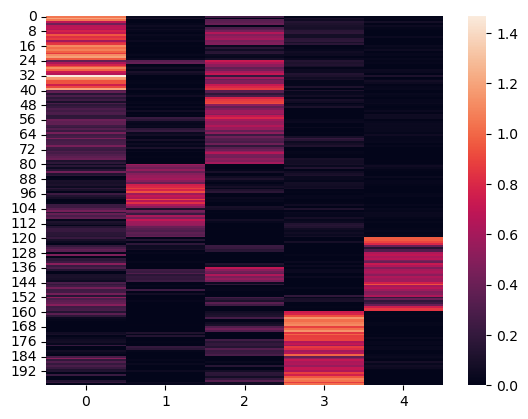

In [111]:
from seaborn import heatmap

heatmap(feature_df)

## NMF analysis (n_components=10)

In [116]:
nmf2=NMF(n_components=10, max_iter=2000, init='random', random_state=69)
nmf_features2=nmf2.fit_transform(dataset)

In [120]:
components_df2=pd.DataFrame(nmf2.components_,columns=["9101.12558588838", "7112.31470067853", "8418.27756106466", "8729.15306364918", "10925.924979131", "6036.91667864666", "6753.68370441107", "3017.06873902124", "8451.5092358895", "10972.1278473662", "7097.06733278415", "6011.85665943984", "10955.5896961202"])
components_df2

,9101.12558588838,7112.31470067853,8418.27756106466,8729.15306364918,10925.924979131,6036.91667864666,6753.68370441107,3017.06873902124,8451.5092358895,10972.1278473662,7097.06733278415,6011.85665943984,10955.5896961202
0,0.021020,0.070787,0.535125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003902,0.000000,0.000000,0.000000
1,0.064348,0.000000,0.000000,1.012803,0.000000,0.012010,0.000000,0.000000,0.010165,0.083683,0.000000,0.000000,0.000000
2,0.057194,0.772601,0.000000,0.000000,0.000000,0.022700,0.000000,0.000000,0.000000,0.708598,0.000000,0.000000,0.808524
3,0.000000,0.000000,0.169012,0.000000,0.000000,0.000000,0.025269,0.022121,0.000000,0.198423,0.000000,0.983703,0.592224
4,0.011422,0.000000,0.272987,0.394162,0.000000,1.764044,0.000000,1.395883,0.000000,0.001890,0.000000,0.000000,0.467465
5,0.000000,0.222556,0.000000,0.000000,0.000000,0.000000,1.151359,0.007723,0.000000,0.085480,0.000000,0.000000,0.000000
6,2.108224,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.087900,0.000000,0.000000,0.026835,0.089988,0.000000
7,0.001900,0.000000,0.390503,0.503345,0.000000,0.000000,0.027941,0.000000,0.017066,0.283090,1.103134,0.000000,0.328757
8,0.000000,0.428537,0.000000,0.000000,0.000000,0.000000,0.000000,0.069909,4.881175,0.000000,0.085594,0.101151,0.000000
9,0.000000,1.052755,0.000000,0.096949,1.340975,0.000000,0.017368,0.012034,0.000000,0.000000,0.031027,0.485315,0.051535


In [121]:
feature_df2=pd.DataFrame(nmf_features2)
reconst_df2=feature_df2.dot(components_df2)
feature_df2

,0,1,2,3,4,5,6,7,8,9
0,0.671165,0.000000,0.163570,0.165084,0.000000,0.449389,0.359520,0.040305,0.003238,0.031888
1,0.371161,0.217575,0.119388,0.093645,0.000000,0.447688,0.460066,0.013199,0.020912,0.001703
2,0.828496,0.000000,0.226258,0.212395,0.005672,0.411673,0.378032,0.114192,0.000000,0.000000
3,0.844052,0.174514,0.231529,0.315051,0.041458,0.440923,0.173647,0.071929,0.000000,0.000000
4,0.815542,0.158200,0.232434,0.305059,0.006594,0.080520,0.183782,0.000000,0.001126,0.028052
...,...,...,...,...,...,...,...,...,...,...
195,0.183311,0.530863,0.000000,0.656004,0.012591,0.097236,0.017551,0.484410,0.000000,0.000920
196,0.189012,0.335540,0.000000,0.824718,0.019361,0.110333,0.030125,0.735218,0.017477,0.006328
197,0.607403,0.539951,0.000000,1.009547,0.027479,0.241076,0.051848,0.500027,0.001282,0.003742
198,0.129764,0.503452,0.000000,0.699631,0.000000,0.233330,0.092147,0.420062,0.022679,0.000000


In [122]:
err=np.trace(cosine_similarity(reconst_df2, dataset))/200
err

0.9959499456255324

<AxesSubplot:>

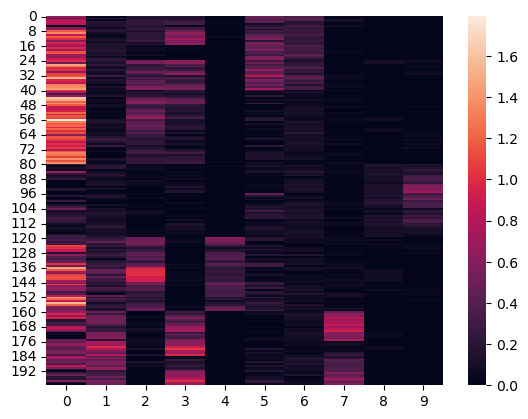

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multi

In [123]:
heatmap(feature_df2)

In [124]:
#feature_df2.to_csv('DTree2.csv',index=False)